In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/aidedd_blocks2.csv')
df.head()

,name,size,type,alignment,languages,ac,hp,cr,speed,swim,...,religion,acrobatics,athletics,intimidation,senses,attributes,actions,legendary_actions,legendary,source
0,aarakocra,medium,humanoid (aarakocra),neutral good,"Auran, Aarakocra",12.0,13,0.25,20,0,...,0,0,0,0,passive Perception 15,Dive Attack. If the aarakocra is flying and di...,"Talon. Melee Weapon Attack: +4 to hit, reach 5...",none,0,Monster Manual (BR)
1,abjurer,medium,humanoid (any race),any alignment,any four languages,12.0,84,9.00,30,0,...,0,0,0,0,passive Perception 11,unavailable,unavailable,unavailable,0,Volo's Guide to Monsters
2,aboleth,large,aberration,lawful evil,"Deep Speech, telepathy 120 ft.",17.0,135,10.00,10,40,...,0,0,0,0,"darkvision 120 ft., passive Perception 20",Amphibious. The aboleth can breathe air and wa...,Multiattack. The aboleth makes three tentacle ...,"The aboleth can take 3 legendary actions, choo...",1,Monster Manual (SRD)
3,abominable-yeti,huge,monstrosity,chaotic evil,Yeti,15.0,137,9.00,40,0,...,0,0,0,0,"darkvision 60 ft., passive Perception 15",unavailable,unavailable,unavailable,0,Monster Manual
4,acererak,medium,undead,neutral evil,"Abyssal, Common, Draconic, Dwarvish, Elvish, G...",21.0,285,23.00,30,0,...,15,0,0,0,"truesight 120 ft., passive Perception 22",unavailable,unavailable,unavailable,0,Adventures (Tomb of Annihilation)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                762 non-null    object 
 1   size                762 non-null    object 
 2   type                762 non-null    object 
 3   alignment           762 non-null    object 
 4   languages           762 non-null    object 
 5   ac                  762 non-null    float64
 6   hp                  762 non-null    int64  
 7   cr                  762 non-null    float64
 8   speed               762 non-null    int64  
 9   swim                762 non-null    int64  
 10  fly                 762 non-null    int64  
 11  climb               762 non-null    int64  
 12  burrow              762 non-null    int64  
 13  passive_perception  762 non-null    int64  
 14  darkvision          762 non-null    int64  
 15  truesight           762 non-null    int64  
 16  tremorse

In [3]:
df = df[['size', 'type', 'ac', 'hp', 'cr', 'speed', 'swim', 'fly', 'strength', 'dex', 'con', 'intel', 'wis', 'cha', 'actions', 'legendary']]

In [4]:
df.head()

,size,type,ac,hp,cr,speed,swim,fly,strength,dex,con,intel,wis,cha,actions,legendary
0,medium,humanoid (aarakocra),12.0,13,0.25,20,0,50,10,14,10,11,12,11,"Talon. Melee Weapon Attack: +4 to hit, reach 5...",0
1,medium,humanoid (any race),12.0,84,9.00,30,0,0,9,14,14,18,12,11,unavailable,0
2,large,aberration,17.0,135,10.00,10,40,0,21,9,15,18,15,18,Multiattack. The aboleth makes three tentacle ...,1
3,huge,monstrosity,15.0,137,9.00,40,0,0,24,10,22,9,13,9,unavailable,0
4,medium,undead,21.0,285,23.00,30,0,0,13,16,20,27,21,20,unavailable,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   size       762 non-null    object 
 1   type       762 non-null    object 
 2   ac         762 non-null    float64
 3   hp         762 non-null    int64  
 4   cr         762 non-null    float64
 5   speed      762 non-null    int64  
 6   swim       762 non-null    int64  
 7   fly        762 non-null    int64  
 8   strength   762 non-null    int64  
 9   dex        762 non-null    int64  
 10  con        762 non-null    int64  
 11  intel      762 non-null    int64  
 12  wis        762 non-null    int64  
 13  cha        762 non-null    int64  
 14  actions    759 non-null    object 
 15  legendary  762 non-null    int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 95.4+ KB


In [6]:
df['type'] = df['type'].str.split(' ').str[0]
df['type'].value_counts()

humanoid       189
beast          105
fiend           89
monstrosity     87
undead          50
dragon          47
elemental       38
aberration      37
giant           27
plant           24
construct       24
fey             21
ooze             8
swarm            8
celestial        8
Name: type, dtype: int64

In [7]:
df[df['actions'].isnull()]

,size,type,ac,hp,cr,speed,swim,fly,strength,dex,con,intel,wis,cha,actions,legendary
255,tiny,beast,11.0,1,0.0,20,20,0,1,13,8,1,8,3,NaN,0
387,medium,humanoid,12.0,18,0.5,40,0,0,11,15,11,13,11,10,NaN,0
566,tiny,beast,11.0,1,0.0,0,20,0,1,12,8,1,10,2,NaN,0


In [8]:
df = df.fillna('unavailable')

In [9]:
df[df['actions'].isnull()]

,size,type,ac,hp,cr,speed,swim,fly,strength,dex,con,intel,wis,cha,actions,legendary


In [10]:
df[df['actions'].str.contains('Multiattack')]

,size,type,ac,hp,cr,speed,swim,fly,strength,dex,con,intel,wis,cha,actions,legendary
2,large,aberration,17.0,135,10.0,10,40,0,21,9,15,18,15,18,Multiattack. The aboleth makes three tentacle ...,1
6,huge,dragon,19.0,195,14.0,40,40,80,23,14,21,14,13,17,Multiattack. The dragon can use its Frightful ...,1
8,huge,dragon,19.0,225,16.0,40,0,80,25,10,23,16,15,19,Multiattack. The dragon can use its Frightful ...,1
9,huge,dragon,18.0,172,13.0,40,0,80,23,10,21,14,13,17,Multiattack. The dragon can use its Frightful ...,1
10,huge,dragon,19.0,212,15.0,40,40,80,25,10,23,16,15,19,Multiattack. The dragon can use its Frightful ...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,large,monstrosity,15.0,127,7.0,40,0,0,19,16,17,17,15,18,Multiattack (Abomination Form Only). The yuan-...,0
753,medium,monstrosity,12.0,66,3.0,30,0,0,16,14,13,14,12,16,For Type 1 | Multiattack (Yuan-ti Form Only). ...,0
755,medium,monstrosity,14.0,71,4.0,30,0,0,16,14,13,14,12,16,Multiattack (Yuan-ti Form Only). The Yuan-ti m...,0
757,medium,humanoid,11.0,40,1.0,30,0,0,11,12,11,13,12,14,Multiattack. The yuan-ti makes two melee attac...,0


In [11]:
df['multiattack'] = df['actions'].str.contains('Multiattack')
df['multiattack'] = df['multiattack'].astype(int)

In [12]:
df = df.drop('actions', axis = 1)

In [13]:
df.head()

,size,type,ac,hp,cr,speed,swim,fly,strength,dex,con,intel,wis,cha,legendary,multiattack
0,medium,humanoid,12.0,13,0.25,20,0,50,10,14,10,11,12,11,0,0
1,medium,humanoid,12.0,84,9.00,30,0,0,9,14,14,18,12,11,0,0
2,large,aberration,17.0,135,10.00,10,40,0,21,9,15,18,15,18,1,1
3,huge,monstrosity,15.0,137,9.00,40,0,0,24,10,22,9,13,9,0,0
4,medium,undead,21.0,285,23.00,30,0,0,13,16,20,27,21,20,0,0


In [14]:
df.to_csv('../data/Final_Monster_Data.csv')

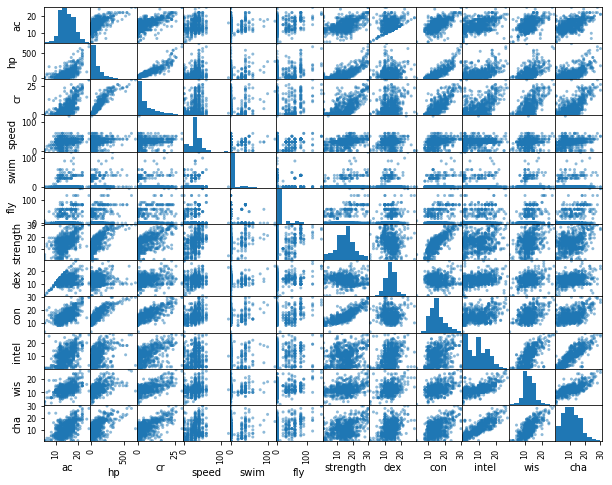

In [15]:
linear_df = df.drop(['legendary', 'multiattack'], axis=1)
pd.plotting.scatter_matrix(linear_df, figsize=(10, 8));